+#WhatsApp Chat Analysis project step-by-step:

###1. Downloading the Data from WhatsApp
Follow the instructions to export the chat data from WhatsApp.
Save the exported chat file (usually a .txt file) to your local system.
###2. Loading the Chat Data into Python
Read the .txt file into Python using appropriate libraries such as pandas or built-in file handling methods.
###3. Preprocessing the Text Data
Define functions to clean and preprocess the text data.
Tasks include removing timestamps, usernames, special characters, and handling emojis.
###4. Incorporating NLP Techniques for Cleaning the Text Data
Further clean the data using NLP techniques.
Remove stopwords, perform stemming or lemmatization, and tokenize the text.
###5. Creating Word Clouds of the Processed Chat Data
Generate word clouds to visualize the most frequent words in the chat data.
Save the word cloud images to your system.
###6. Extracting Information Through Sentiment Analysis
Perform sentiment analysis on the chat data to understand the overall sentiment.
Use libraries like TextBlob, VADER, or NLTK for sentiment analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
!pip install utils

In [5]:
 import pandas as pd

df = pd.read_csv('/content/WhatsApp Chat.txt', sep='\t')  # Use read_csv with appropriate separator

In [6]:
df.head()

,"25/12/2023, 3:53 pm - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more."
0,"27/12/2023, 2:05 pm - Kanha💙: Hyy"
1,"27/12/2023, 2:05 pm - Kanha💙: Payment dal diya"
2,"27/12/2023, 2:06 pm - Kanha💙: Dal naa"
3,"27/12/2023, 2:48 pm - Dashrath: Abhi nii h"
4,"27/12/2023, 6:16 pm - Kanha💙: Hy"


In [7]:
!pip install pandas
import pandas as pd

def import_data(file_path):
    """
    Imports data from a text file.

    Args:
        file_path (str): The path to the text file.

    Returns:
        pandas.DataFrame: The imported data as a DataFrame.
    """
    df = pd.read_csv(file_path, sep='\t')  # Use read_csv with appropriate separator
    return df

df = import_data('/content/WhatsApp Chat.txt')

In [10]:
df.shape # total number of messeges is 233

(233, 1)

In [11]:
df.head(10)

,"25/12/2023, 3:53 pm - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more."
0,"27/12/2023, 2:05 pm - Kanha💙: Hyy"
1,"27/12/2023, 2:05 pm - Kanha💙: Payment dal diya"
2,"27/12/2023, 2:06 pm - Kanha💙: Dal naa"
3,"27/12/2023, 2:48 pm - Dashrath: Abhi nii h"
4,"27/12/2023, 6:16 pm - Kanha💙: Hy"
5,"28/12/2023, 12:25 pm - Kanha💙: This message wa..."
6,"28/12/2023, 12:25 pm - Kanha💙: <Media omitted>"
7,"28/12/2023, 12:25 pm - Kanha💙: Kisi ko chiye too"
8,"28/12/2023, 12:25 pm - Kanha💙: Afim ke liye too"
9,"28/12/2023, 12:25 pm - Kanha💙: Bol dena muje"


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 1 columns):
 #   Column                                                                                                                                                             Non-Null Count  Dtype 
---  ------                                                                                                                                                             --------------  ----- 
 0   25/12/2023, 3:53 pm - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.  233 non-null    object
dtypes: object(1)
memory usage: 1.9+ KB


In [13]:
df.columns

Index(['25/12/2023, 3:53 pm - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.'], dtype='object')

In [14]:
import re

def preprocess_chat_data(chat_data):
    cleaned_data = []
    for line in chat_data:
        # Remove timestamps and usernames
        line = re.sub(r'^\[\d{1,2}/\d{1,2}/\d{2,4}, \d{1,2}:\d{2}(?:\s[APap][mM])?\] ', '', line)
        # Remove special characters and numbers
        line = re.sub(r'\W+', ' ', line)
        cleaned_data.append(line.lower())
    return cleaned_data

# Read the chat data from the file, assuming it's line-separated
with open('/content/WhatsApp Chat.txt', 'r') as file:
    chat_data = file.readlines()

cleaned_chat_data = preprocess_chat_data(chat_data)

# Display the first few lines of the cleaned chat data
print(cleaned_chat_data[:10])

['25 12 2023 3 53 pm messages and calls are end to end encrypted no one outside of this chat not even whatsapp can read or listen to them tap to learn more ', '27 12 2023 2 05 pm kanha hyy ', '27 12 2023 2 05 pm kanha payment dal diya ', '27 12 2023 2 06 pm kanha dal naa ', '27 12 2023 2 48 pm dashrath abhi nii h ', '27 12 2023 6 16 pm kanha hy ', '28 12 2023 12 25 pm kanha this message was deleted ', '28 12 2023 12 25 pm kanha media omitted ', '28 12 2023 12 25 pm kanha kisi ko chiye too ', '28 12 2023 12 25 pm kanha afim ke liye too ']


In [15]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def nlp_cleaning(data):
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    cleaned_data = []
    for line in data:
        tokens = word_tokenize(line)
        filtered_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
        cleaned_data.append(' '.join(filtered_tokens))
    return cleaned_data

nlp_cleaned_data = nlp_cleaning(cleaned_chat_data)

# Display the first few lines of the NLP cleaned chat data
print(nlp_cleaned_data[:10])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


['25 12 2023 3 53 pm message call end end encrypted one outside chat even whatsapp read listen tap learn', '27 12 2023 2 05 pm kanha hyy', '27 12 2023 2 05 pm kanha payment dal diya', '27 12 2023 2 06 pm kanha dal naa', '27 12 2023 2 48 pm dashrath abhi nii h', '27 12 2023 6 16 pm kanha hy', '28 12 2023 12 25 pm kanha message deleted', '28 12 2023 12 25 pm kanha medium omitted', '28 12 2023 12 25 pm kanha kisi ko chiye', '28 12 2023 12 25 pm kanha afim ke liye']


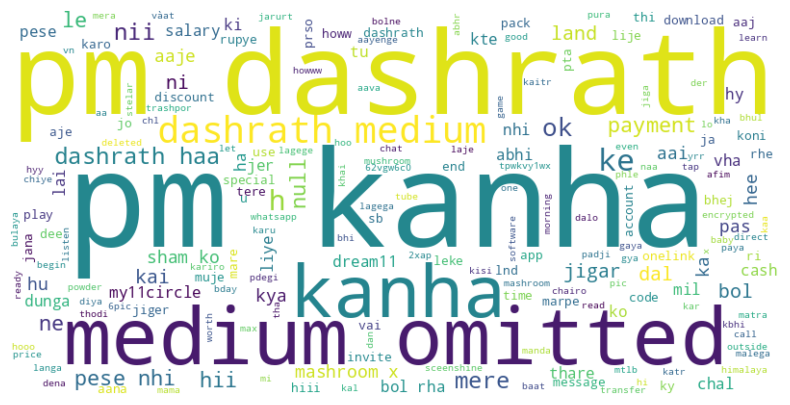

In [16]:
 from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(nlp_cleaned_data))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Save the word cloud image
wordcloud.to_file('wordcloud.png')


        Sentiment
count  239.000000
mean     0.004573
std      0.142997
min     -0.500000
25%      0.000000
50%      0.000000
75%      0.000000
max      0.700000


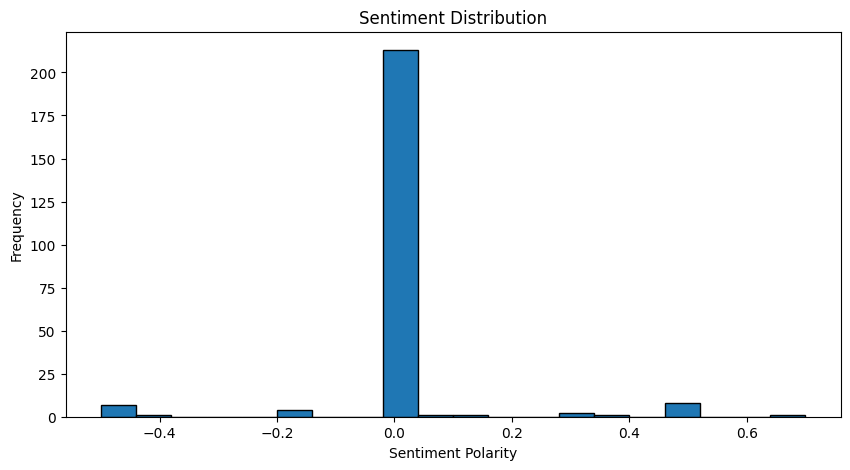

In [17]:
from textblob import TextBlob

def perform_sentiment_analysis(data):
    sentiments = [TextBlob(line).sentiment.polarity for line in data]
    return sentiments

sentiments = perform_sentiment_analysis(nlp_cleaned_data)

# Create a DataFrame for sentiments
sentiment_df = pd.DataFrame(sentiments, columns=['Sentiment'])

# Display basic statistics
print(sentiment_df.describe())

# Plot the sentiment distribution
plt.figure(figsize=(10, 5))
plt.hist(sentiment_df['Sentiment'], bins=20, edgecolor='black')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()
